Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

#import beautifulsoup
from bs4 import BeautifulSoup

#WORD cloud
from wordcloud import WordCloud

#cosine similarity
from concurrent.futures import ProcessPoolExecutor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import multiprocessing
import nltk
nltk.download('punkt')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

import string
import multiprocessing
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.graph_objects as go


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DataSet

In [3]:
#read the data train.csv

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/train1.csv',encoding='utf-8')

#check the head of the data
df_train.head()


id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

**Analysis Of Data**

In [4]:
df_train.shape

(404290, 6)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df_train.describe()

id           qid1           qid2   is_duplicate
count  404290.000000  404290.000000  404290.000000  404290.000000
mean   202144.500000  217243.942418  220955.655337       0.369198
std    116708.614503  157751.700002  159903.182629       0.482588
min         0.000000       1.000000       2.000000       0.000000
25%    101072.250000   74437.500000   74727.000000       0.000000
50%    202144.500000  192182.000000  197052.000000       0.000000
75%    303216.750000  346573.500000  354692.500000       1.000000
max    404289.000000  537932.000000  537933.000000       1.000000

In [7]:
#check the number of missing data
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
#check the number of duplicate data
df_train.duplicated().sum()

0

**Visualizations**

<Axes: xlabel='is_duplicate', ylabel='count'>

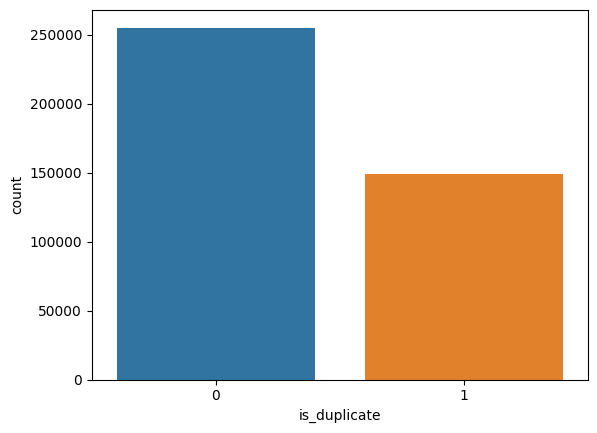

In [9]:
#plot the distribution of the target variable

sns.countplot(x=df_train['is_duplicate'])

In [10]:
#check the number of unique questions
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the data: {}'.format(len(np.unique(qids))))

Total number of questions in the data: 537933


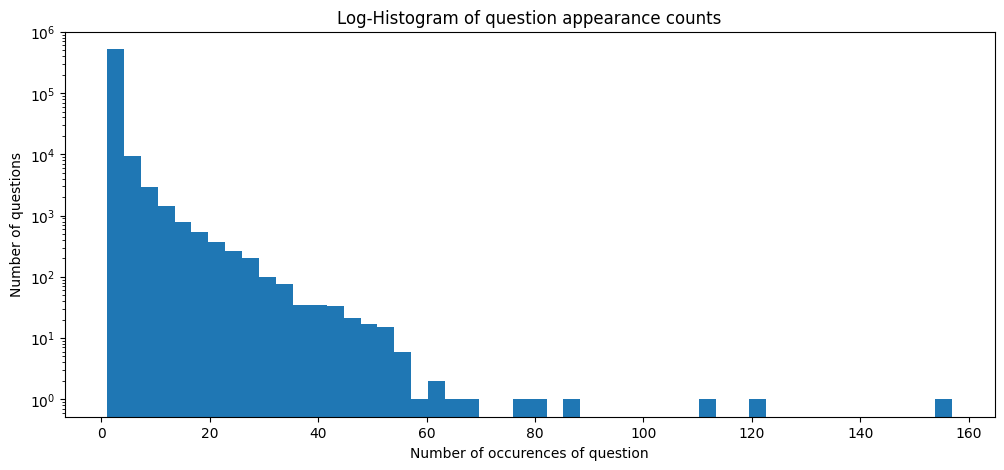

In [11]:
#plot the distribution of the number of questions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()


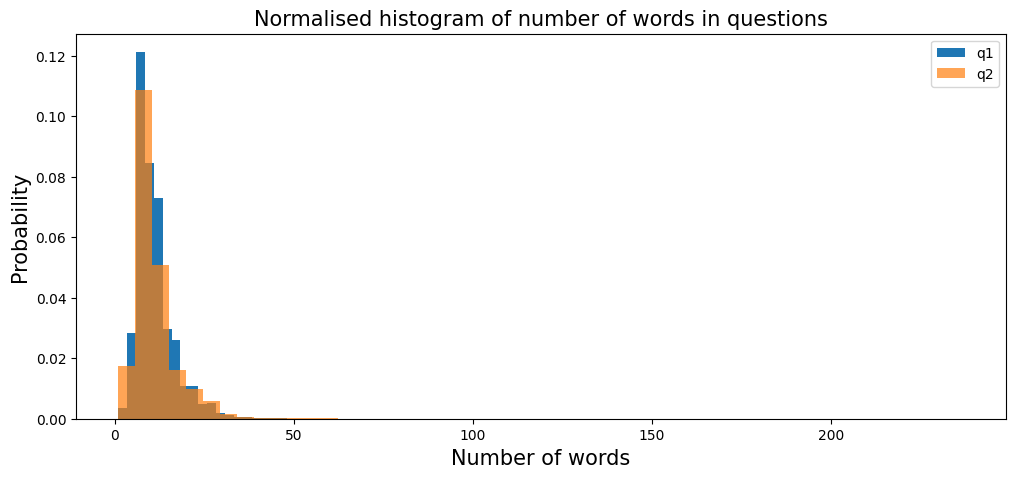

In [12]:
#plot the distribution of the number of words in the questions
plt.figure(figsize=(12, 5))
plt.hist(df_train['question1'].apply(lambda x: len(str(x).split(' '))), bins=50, density=True, label='q1')
plt.hist(df_train['question2'].apply(lambda x: len(str(x).split(' '))), bins=50, density=True, alpha=0.7, label='q2')
plt.legend()

plt.title('Normalised histogram of number of words in questions', fontsize=15)
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

**Word Cloud**

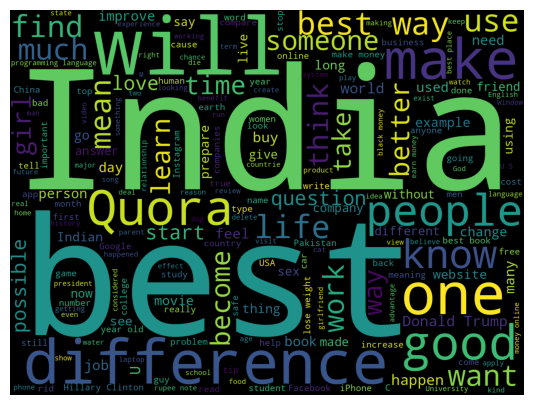

In [13]:
#make a word cloud for the question 1 with top 10 words
plt.figure(figsize=(12, 5))

cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_train['question1'].astype(str)))

plt.imshow(cloud)

plt.axis('off')

plt.show()


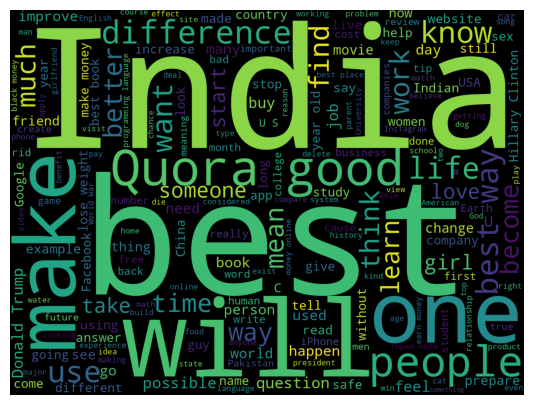

In [14]:
#make a word cloud for the question 2 with top 10 words
plt.figure(figsize=(12,5))

cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_train['question2'].astype(str)))

plt.imshow(cloud)

plt.axis('off')

plt.show()


Get the rows Which has is_duplicate label = 1

In [15]:
import numpy as np
j=0
for i in range (0,df_train.shape[0]):
    if df_train["is_duplicate"].iloc[i] == 1:
        if j < 10:
            print(df_train["question1"].iloc[i], " ",df_train["question2"].iloc[i])
            j=j+1

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?   I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
How can I be a good geologist?   What should I do to be a great geologist?
How do I read and find my YouTube comments?   How can I see all my Youtube comments?
What can make Physics easy to learn?   How can you make physics easy to learn?
What was your first sexual experience like?   What was your first sexual experience?
What would a Trump presidency mean for current international master’s students on an F1 visa?   How will a Trump presidency affect the students presently in US or planning to study in US?
What does manipulation mean?   What does manipulation means?
Why are so many Quora users posting questions that are readily answered on Google?   Why do people ask Quora questions which can be answered easily by Google?
Why do rockets look white?   Why are rockets and boosters painted white?
How should I pr

In [16]:
#calculate the length of the question1 and question2 and store it in a new column
df_train['q1_len'] = df_train['question1'].astype(str).apply(len)
df_train['q2_len'] = df_train['question2'].astype(str).apply(len)

#store the length difference in a new column
df_train['len_diff'] = df_train['q1_len'] - df_train['q2_len']

#check the head of the data
df_train.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1_len  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2_len  len_diff  
0      57         9  
1      88       -37  
2      59        14  
3      65       -15  
4      39        37

**Pre-Processing**

In [17]:
#remove the id, qid1, qid2
df_train.drop(['id','qid1','qid2'],axis=1,inplace=True)

df_train.head()

question1  \
0  What is the step by step guide to invest in sh...   
1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2  How can I increase the speed of my internet co...   
3  Why am I mentally very lonely? How can I solve...   
4  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1_len  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2_len  len_diff  
0      57         9  
1      88       -37  
2      59        14  
3      65       -15  
4      39        37

In [18]:

# Create a set of stopwords
stopwords_set = set(stopwords.words('english'))

def preprocess(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return ''
    
    # Remove punctuations using str.replace()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords using a set
    tokens = [token for token in tokens if token not in stopwords_set]
    
    # Join the tokens back into a string
    text = " ".join(tokens)
    
    return text


def apply_parallel(series, func, num_processes):
    with multiprocessing.Pool(num_processes) as pool:
        result = pool.map(func, series)
    return pd.Series(result, index=series.index)


In [19]:
%%time
# Apply the preprocess() function to every row of the DataFrame using parallel processing
df_train['question1'] = apply_parallel(df_train['question1'], preprocess, 4)
df_train['question2'] = apply_parallel(df_train['question2'], preprocess, 4)

CPU times: user 930 ms, sys: 310 ms, total: 1.24 s
Wall time: 1min 12s


In [20]:
df_train.head()

question1  \
0          step step guide invest share market india   
1                    story kohinoor kohinoor diamond   
2       increase speed internet connection using vpn   
3                              mentally lonely solve   
4  one dissolve water quikly sugar salt methane c...   

                                           question2  is_duplicate  q1_len  \
0                step step guide invest share market             0      66   
1  would happen indian government stole kohinoor ...             0      51   
2               internet speed increased hacking dns             0      73   
3           find remainder math2324math divided 2423             0      50   
4                      fish would survive salt water             0      76   

   q2_len  len_diff  
0      57         9  
1      88       -37  
2      59        14  
3      65       -15  
4      39        37

In [21]:
#get the first ten rows and store in a new dataframe
df_train1 = df_train.head(10)

#check the head of the data
df_train1

question1  \
0          step step guide invest share market india   
1                    story kohinoor kohinoor diamond   
2       increase speed internet connection using vpn   
3                              mentally lonely solve   
4  one dissolve water quikly sugar salt methane c...   
5  astrology capricorn sun cap moon cap risingwha...   
6                                          buy tiago   
7                                     good geologist   
8                                    use シ instead し   
9    motorola company hack charter motorolla dcx3400   

                                           question2  is_duplicate  q1_len  \
0                step step guide invest share market             0      66   
1  would happen indian government stole kohinoor ...             0      51   
2               internet speed increased hacking dns             0      73   
3           find remainder math2324math divided 2423             0      50   
4                      fish would survive salt water             0      76   
5  im triple capricorn sun moon ascendant caprico...             1      86   
6        keeps childern active far phone video games             0      19   
7                                    great geologist             1      30   
8                                        use instead             0      31   
9                hack motorola dcx3400 free internet             0      60   

   q2_len  len_diff  
0      57         9  
1      88       -37  
2      59        14  
3      65       -15  
4      39        37  
5      90        -4  
6      62       -43  
7      41       -11  
8      37        -6  
9      49        11

**Making Corpus for BOW**

In [22]:
corpus = pd.concat([df_train['question1'], df_train['question2']]).reset_index(drop=True)

**BOW**

In [23]:

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)


In [24]:
q1_bow = X[0]
q2_bow = X[len(df_train['question1'])]

**Calculating Cosine Similarity**

In [25]:
similarity = cosine_similarity(q1_bow, q2_bow)


In [26]:

def calculate_similarity(i):
    q1_bow = X[i]
    q2_bow = X[len(df_train['question1']) + i]
    similarity = cosine_similarity(q1_bow, q2_bow)
    return similarity[0, 0]

n = len(df_train['question1'])

from concurrent.futures import ThreadPoolExecutor

# Choose the number of worker threads based on your system's capabilities
num_workers = 4

with ThreadPoolExecutor(max_workers=num_workers) as executor:
    similarities = list(executor.map(calculate_similarity, range(n)))

# Convert the list to a NumPy array
similarities = np.array(similarities)



In [27]:
df_train['cosine_similarity']=similarities

In [ ]:
#if the cosine similarity is greater than 0.5 then it is a duplicate question

df_train['is_duplicate_pred'] = df_train['cosine_similarity'].apply(lambda x: 1 if x > 0.5 else 0)

df_train.head(10)

#calculate the accuracy

from sklearn.metrics import accuracy_score


accuracy_score(df_train['is_duplicate'], df_train['is_duplicate_pred'])

#calculate the confusion matrix


from sklearn.metrics import confusion_matrix

confusion_matrix(df_train['is_duplicate'], df_train['is_duplicate_pred'])


#calculate the precision, recall and f1 score

from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(df_train['is_duplicate'], df_train['is_duplicate_pred'], average='binary')


#calculate the f1 score


from sklearn.metrics import f1_score


f1_score(df_train['is_duplicate'], df_train['is_duplicate_pred'], average='binary')


#calculate the roc_auc_score


from sklearn.metrics import roc_auc_score


roc_auc_score(df_train['is_duplicate'], df_train['is_duplicate_pred'])


#calculate the log loss


from sklearn.metrics import log_loss


log_loss(df_train['is_duplicate'], df_train['is_duplicate_pred'])



#calculate the mean squared error


from sklearn.metrics import mean_squared_error


mean_squared_error(df_train['is_duplicate'], df_train['is_duplicate_pred'])


#calculate the mean absolute error


from sklearn.metrics import mean_absolute_error


mean_absolute_error(df_train['is_duplicate'], df_train['is_duplicate_pred'])




In [28]:
df_train

question1  \
0               step step guide invest share market india   
1                         story kohinoor kohinoor diamond   
2            increase speed internet connection using vpn   
3                                   mentally lonely solve   
4       one dissolve water quikly sugar salt methane c...   
...                                                   ...   
404285  many keywords racket programming language late...   
404286                                 believe life death   
404287                                           one coin   
404288  approx annual cost living studying uic chicago...   
404289                                    like sex cousin   

                                                question2  is_duplicate  \
0                     step step guide invest share market             0   
1       would happen indian government stole kohinoor ...             0   
2                    internet speed increased hacking dns             0   
3                find remainder math2324math divided 2423             0   
4                           fish would survive salt water             0   
...                                                   ...           ...   
404285  many keywords perl programming language latest...             0   
404286                                    true life death             1   
404287                                         whats coin             0   
404288  little hairfall problem want use hair styling ...             0   
404289                                    like sex cousin             0   

        q1_len  q2_len  len_diff  cosine_similarity  
0           66      57         9           0.942809  
1           51      88       -37           0.615457  
2           73      59        14           0.365148  
3           50      65       -15           0.000000  
4           76      39        37           0.282843  
...        ...     ...       ...                ...  
404285      85      79         6           0.857143  
404286      41      42        -1           0.666667  
404287      17      17         0           0.500000  
404288      94     127       -33           0.000000  
404289      37      45        -8           1.000000  

[404290 rows x 7 columns]

**Mini-Batch K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters (k): 5


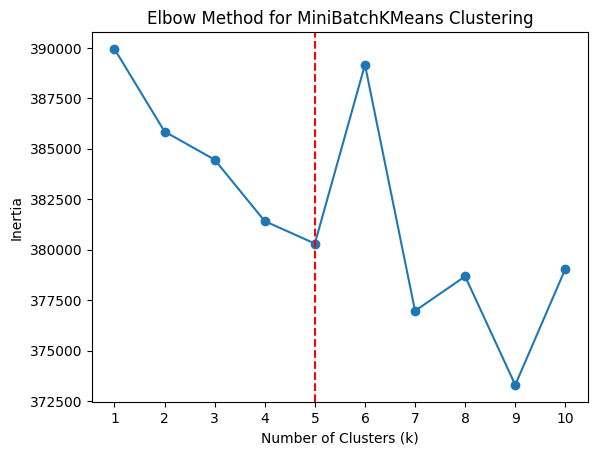

In [29]:
# Combine the text from question1 and question2 into a single column
df_train['text'] = df_train['question1'] + ' ' + df_train['question2']
df_train['text'] = df_train['text'].fillna('')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_train['text'])

# Apply MiniBatchKMeans clustering with different values of k
inertias = []
ks = range(1, 11)
for k in ks:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for MiniBatchKMeans Clustering')
plt.xticks(np.arange(1, 11))

# Find the elbow point
diff = np.diff(inertias)

diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r) + 1]
print(f'Optimal number of clusters (k): {k_opt}')

# Plot the elbow point
plt.axvline(x=k_opt, color='r', linestyle='--')
plt.show()



Number of Clusters :  1


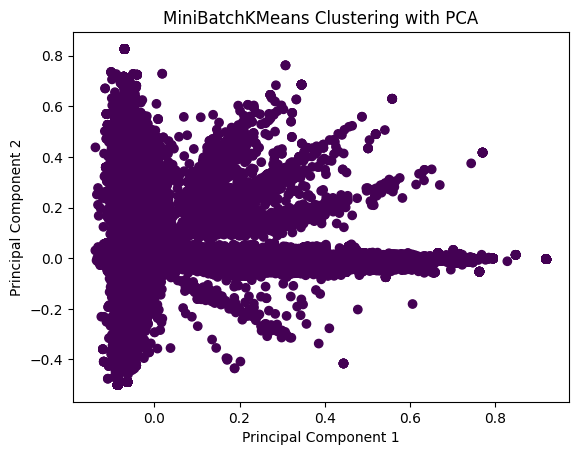

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  2


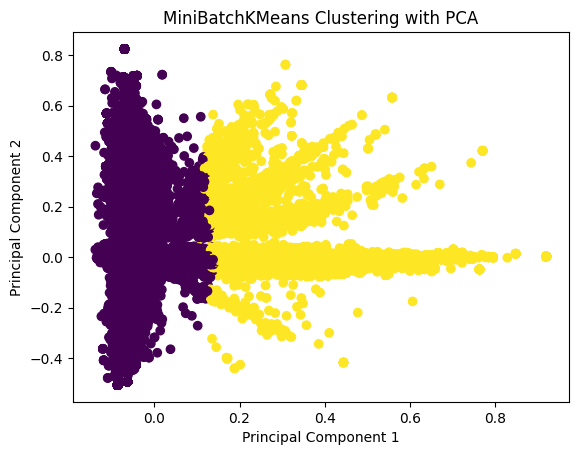

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  3


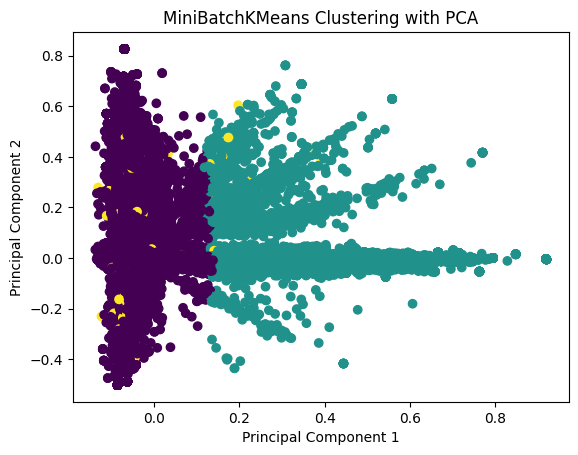

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  4


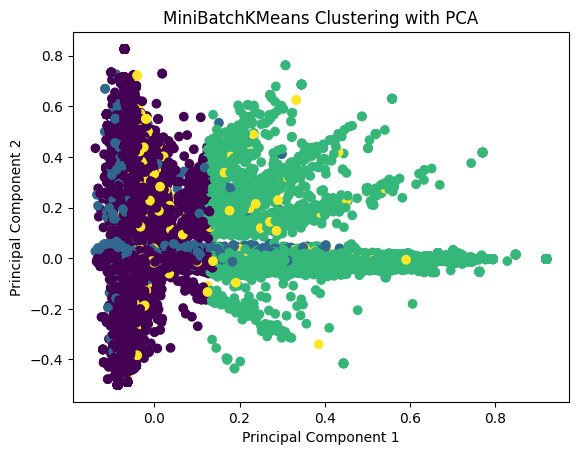

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  5


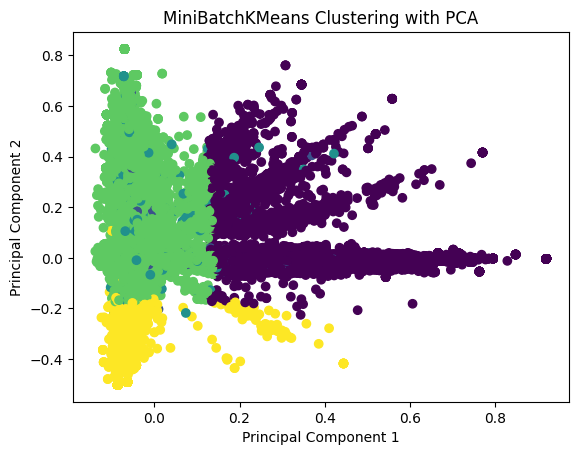

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  6


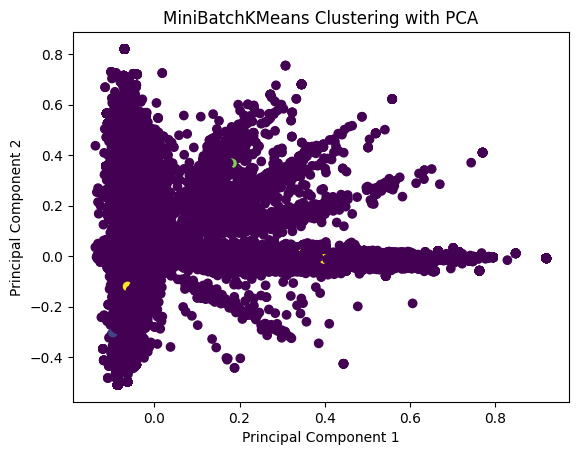

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  7


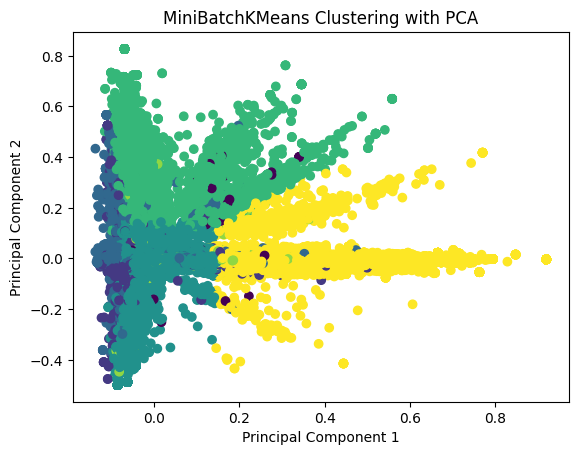

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  8


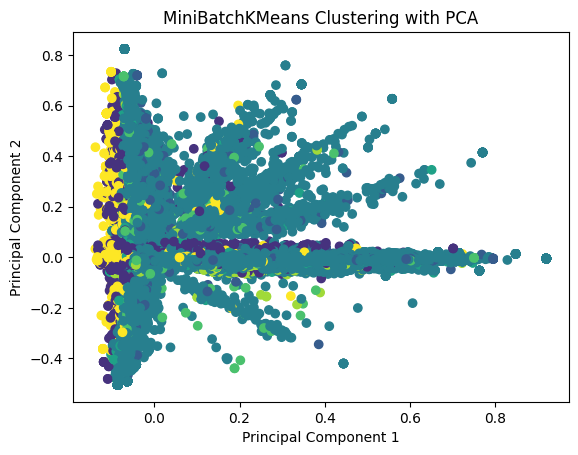

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters :  9


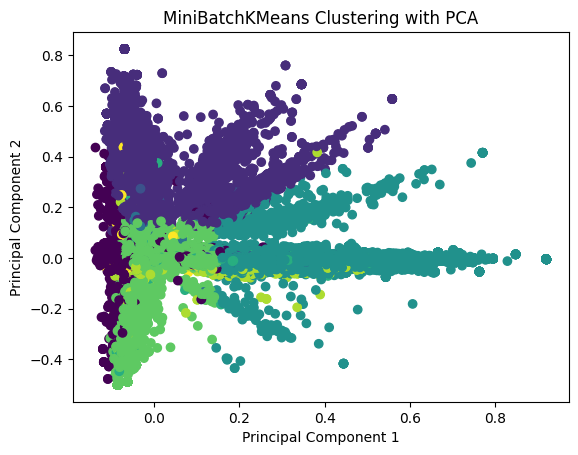

In [30]:

# Apply MiniBatchKMeans clustering with the optimal number of clusters
for i in range(1, 10):
    kmeans = MiniBatchKMeans(n_clusters=i, random_state=0)
    kmeans.fit(tfidf_matrix)
    df_train['cluster'] = kmeans.labels_
    # Reduce the dimensionality of the TF-IDF matrix with PCA
    pca = PCA(n_components=2)
    tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

    # Plot the clusters
    print('Number of Clusters : ', i)
    plt.scatter(tfidf_matrix_reduced[:, 0], tfidf_matrix_reduced[:, 1], c=df_train['cluster'])
    plt.title('MiniBatchKMeans Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()



In [ ]:
# Apply MiniBatchKMeans clustering with the optimal number of clusters = 2

kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)


kmeans.fit(tfidf_matrix)



df_train['cluster'] = kmeans.labels_


#check the accuracy of the model

accuracy_score(df_train['is_duplicate'], df_train['cluster'])


#calculate the confusion matrix


confusion_matrix(df_train['is_duplicate'], df_train['cluster'])



In [31]:
fig = go.Figure()

# Plot data points
for i in range(4):
    cluster_data = df_train[df_train['cluster'] == i]
    fig.add_trace(go.Scattergl(x=cluster_data['question1'], y=cluster_data['question2'], mode='markers',
                               marker=dict(size=4, opacity=0.6),  # Adjust marker size and opacity here
                               name=f'Cluster {i+1}', text=cluster_data.index))

# Plot centroids
fig.add_trace(go.Scattergl(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                           mode='markers', marker=dict(size=10, color='rgba(0, 0, 0, 1)', symbol='star'),
                           name='Centroids'))

# Customize the plot
fig.update_layout(title='K-means Clustering',
                  xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True,
                  hovermode='closest')

# Show the plot
fig.show()

In [32]:
# bert model

!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.5 MB/s eta 0:00:00


In [34]:
import torch

# Check if GPU is available

if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())    
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...

else:

    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

    
# import the model
from transformers import BertTokenizer, BertModel

# Load the BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the BERT model

model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the text

tokens = tokenizer.tokenize(df_train['question1'][0])

# Print the tokens

print(tokens)

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['step', 'step', 'guide', 'invest', 'share', 'market', 'india']


In the context of BERT, input IDs refer to the integer representations of the tokens in a given input sequence. Each token is mapped to a unique integer ID using the BERT tokenizer.

In [35]:
# Tokenize all of the sentences and map the tokens to thier word IDs.

input_ids = []
input_ids2=[]

# For every sentence...

def assign_id(df):

  input_id=[]

  for sent in df:

      # `encode` will:
      #   (1) Tokenize the sentence.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.


      '''
      When tokenizer.encode is called with these arguments, the tokenizer performs the following steps:

      Tokenization: The input sentence is first tokenized into a list of subwords using the BERT tokenizer.
      Special tokens: The tokenizer then adds special tokens such as [CLS] and [SEP] to the tokenized sequence, as specified by the add_special_tokens argument.
      Encoding: The resulting sequence of subwords (including the special tokens) is then converted to a sequence of integer IDs using the BERT vocabulary.

      '''


      encoded_sent = tokenizer.encode(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                    )
      
      '''
      [CLS] and [SEP] are special tokens that are added to input sequences when using BERT for sequence classification or similarity tasks.

      [CLS] stands for "classification" and is a special token added at the beginning of the input sequence.
      It is used to represent the "class" or "category" of the input sequence. 
      In the case of question similarity detection, the category might be "similar" or "not similar",
      depending on whether the two questions are similar or not.

      [SEP] stands for "separator" and is a special token added between the two input sequences.
      It is used to separate the two sequences so that the BERT model can distinguish between them.

      '''
      # Add the encoded sentence to the list.
      input_id.append(encoded_sent)

  return input_id

input_ids=assign_id(df_train['question1'])

# Print sentence 0, now as a list of IDs.

print('Original: ', df_train['question1'][0])

print('Token IDs:', input_ids[0])

Original:  step step guide invest share market india
Token IDs: [101, 3357, 3357, 5009, 15697, 3745, 3006, 2634, 102]


In [36]:
input_ids2=assign_id(df_train['question2'])

# Print sentence 0, now as a list of IDs.

print('Original: ', df_train['question2'][0])

print('Token IDs:', input_ids2[0])


Original:  step step guide invest share market
Token IDs: [101, 3357, 3357, 5009, 15697, 3745, 3006, 102]


In [37]:
max_len = max([len(sen) for sen in input_ids])
max_len2 = max([len(sen) for sen in input_ids2])

max_len=max(max_len,max_len2)
max_len

119

In [38]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00


Padding is necessary when using BERT for question similarity detection, as the model expects inputs of fixed length. In natural language processing, input sentences or questions may have different lengths. However, neural network models such as BERT require input data of fixed length, meaning all input sequences must have the same number of tokens.


In [39]:

from keras_preprocessing.sequence import pad_sequences
def apply_padding(input_ids):
  # calculate the max length 

  #i am doing this because i have calcualted the ids for 


  print('\nPadding/truncating all sentences to %d values...' % max_len)

  print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

  # Pad our input tokens with value 0.

  # "post" indicates that we want to pad and truncate at the end of the sequence,


  input_ids = pad_sequences(input_ids, maxlen=max_len, dtype="long",

                              value=0, truncating="post", padding="post")
  
  return input_ids


input_ids=apply_padding(input_ids)
input_ids2=apply_padding(input_ids2)



Padding/truncating all sentences to 119 values...

Padding token: "[PAD]", ID: 0

Padding/truncating all sentences to 119 values...

Padding token: "[PAD]", ID: 0


The attention mask is a tensor that is used to tell the BERT model
which parts of the input sequence are "real" tokens and which parts are padding tokens.

In [40]:
# Create attention masks

'''

we have applied padding above to make every question of similar length but how will the model come to know that 
which part was the real one's and which we had made using padding ... so that's why i have used attention_mask.

'''

attention_masks = []
attention_masks2=[]


def apply_masking(input_ids):
  # For each sentence...

  attention_mask=[]
  for sent in input_ids:

          att_mask = [int(token_id > 0) for token_id in sent]
          
          attention_mask.append(att_mask)

  return attention_mask

# Print sentence 0, now as a list of IDs.

attention_masks=apply_masking(input_ids)
attention_masks2=apply_masking(input_ids2)

print('Original q1: ', df_train['question1'][0])

print('Token IDs of q1:', input_ids[0])

print('Attention Mask at q1:', attention_masks[0])

print('Original q2: ', df_train['question2'][0])

print('Token IDs of q2:', input_ids2[0])

print('Attention Mask at q2:', attention_masks2[0])

Original q1:  step step guide invest share market india
Token IDs of q1: [  101  3357  3357  5009 15697  3745  3006  2634   102     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]
Attention Mask at q1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
import random

# we have input_ids and attention_masks as lists of length 404290

# Calculate the length of 10% of the input
num_samples = int(len(input_ids) * 0.1)
num_samples2= int(len(input_ids2) * 0.1)

# Use random.sample to select num_samples indices without replacement
random_indices = random.sample(range(len(input_ids)), num_samples)
random_indices2=random.sample(range(len(input_ids2)), num_samples2)

# Create a new list of input_ids and attention_masks using the selected indices
sample_input_ids = [input_ids[i] for i in random_indices]
sample_input_ids2 = [input_ids2[i] for i in random_indices2]

sample_attention_masks = [attention_masks[i] for i in random_indices]
sample_attention_masks2 = [attention_masks2[i] for i in random_indices2]

In [42]:
len(sample_input_ids)

40429

In [43]:
len(sample_input_ids2)

40429

In [44]:
len(sample_attention_masks)

40429

In [45]:
len(sample_attention_masks2)

40429

In [46]:
# Select the same rows from df['is_duplicate']
sample_is_duplicate = [df_train['is_duplicate'][i] for i in random_indices]

In [47]:
#make batces to calculate embeddings

def make_batches(input_ids,attention_masks):

    input_ids = torch.tensor(input_ids)
    
    attention_masks = torch.tensor(attention_masks)
    
    batch_size = 32
    
    # Create the DataLoader.
    
    from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
    
    # Create the DataLoader for our training set.
    
    data = TensorDataset(input_ids, attention_masks)
    
    sampler = SequentialSampler(data)
    
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    
    return dataloader


#make batches for question1

dataloader=make_batches(sample_input_ids,sample_attention_masks)

#make batches for question2

dataloader2=make_batches(sample_input_ids2,sample_attention_masks)

<ipython-input-47-518be11710ce>:5: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)



In [48]:
dataloader

In [49]:
def calculate_embeddings(batches):
    embeddings = []
    for batch in batches:
        batch1 = torch.tensor(batch[0]).to(device)  # Move input tensor to device
        batch2 = torch.tensor(batch[1]).to(device)  # Move input tensor to device
        with torch.no_grad():
            last_hidden_states = model(batch1, attention_mask=batch2)
        embeddings.append(last_hidden_states[0][:, 0, :].cpu().numpy())  # Move output tensor to CPU

    return embeddings

# Move the model to the device
model = model.to(device)

# Define the device based on availability of CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

embeddings = calculate_embeddings(dataloader)

<ipython-input-49-400344d945c4>:4: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-49-400344d945c4>:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [50]:
embeddings2 = calculate_embeddings(dataloader2)

<ipython-input-49-400344d945c4>:4: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-49-400344d945c4>:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [51]:
embeddings

[array([[-0.35261935,  0.11086408, -0.37633818, ..., -0.08782947,
         -0.20006402,  0.290893  ],
        [-0.12169477,  0.09331688, -0.22031894, ..., -0.6638049 ,
          0.42579016,  0.48688927],
        [-0.5163541 , -0.03862153, -0.01665033, ..., -0.47607476,
          0.12847562,  0.5319038 ],
        ...,
        [-0.19418085, -0.08980672, -0.41576734, ..., -0.4681913 ,
         -0.25966343,  0.75839865],
        [-0.28283226, -0.23718075,  0.3030373 , ..., -0.6942244 ,
          0.36931533,  0.34119916],
        [-0.5869763 , -0.00723354, -0.0156821 , ..., -0.4936992 ,
          0.13319343,  0.6141463 ]], dtype=float32),
 array([[ 0.07636322,  0.1962723 , -0.18416828, ..., -0.7401862 ,
         -0.19433318,  0.5905054 ],
        [-0.22824092,  0.17242807, -0.3413831 , ..., -0.4804594 ,
          0.34156838,  0.24639994],
        [-0.27582914,  0.1679101 , -0.07998149, ..., -0.5534955 ,
          0.21684742,  0.22644609],
        ...,
        [-0.8405162 , -0.12732813,  0.0

In [52]:
#calculate cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(embeddings, embeddings2):

    cos_sim = []
    
    for i in range(len(embeddings)):
        if i<3:
          print(cosine_similarity(embeddings[i], embeddings2[i]))
        cos_sim.append(np.squeeze(cosine_similarity(embeddings[i], embeddings2[i])))
        
    return cos_sim

cosine_similarity = calculate_cosine_similarity(embeddings, embeddings2)


[[0.21313563 0.16155961 0.24251816 ... 0.8356495  0.7274121  0.81851196]
 [0.14970341 0.16367744 0.15848444 ... 0.7572892  0.67652905 0.8475745 ]
 [0.17569157 0.17186022 0.2138745  ... 0.81453    0.71778953 0.86199474]
 ...
 [0.17601952 0.18603116 0.23987478 ... 0.78830314 0.6977786  0.79167104]
 [0.21859021 0.2946671  0.32917377 ... 0.8091004  0.76492125 0.83436763]
 [0.18983558 0.25116277 0.27296603 ... 0.7979152  0.73199576 0.8285625 ]]
[[0.30812654 0.16802971 0.83608055 ... 0.56041384 0.8237079  0.68553644]
 [0.3102113  0.1898655  0.8375279  ... 0.60151315 0.83139277 0.6991651 ]
 [0.28626323 0.15180008 0.8609733  ... 0.6630961  0.85634273 0.7109976 ]
 ...
 [0.25432855 0.13930981 0.8181224  ... 0.42433923 0.7581002  0.64796805]
 [0.26750863 0.09052762 0.81707656 ... 0.5910414  0.8985163  0.6890056 ]
 [0.324345   0.16470392 0.78276145 ... 0.53216314 0.80159754 0.7001275 ]]
[[0.1663859  0.7622191  0.8772588  ... 0.20702386 0.84344554 0.12600875]
 [0.17150751 0.78658724 0.8252423  ... 

In [53]:
cos = np.zeros(40429)
m=0


for i in range(len(cosine_similarity)):
  for j in range(len(cosine_similarity[i])):
      for k in  range(len(cosine_similarity[i][j])):
        if j==k:
          cos[k]=cosine_similarity[i][j][k]
        

In [54]:
for i in range(len(cos)):
  if(cos[i]>0.5):
    cos[i]=1
  else:
    cos[i]=0

In [55]:

#import accuracy_score
from sklearn.metrics import accuracy_score

#calculate accuracy of cosine similarity

def calculate_accuracy_cosine_similarity(cosine_similarity,sample_is_duplicate):

    accuracy=accuracy_score(sample_is_duplicate,cosine_similarity)
    return accuracy


accuracy_cosine_similarity=calculate_accuracy_cosine_similarity(cos,sample_is_duplicate)

In [56]:
print(accuracy_cosine_similarity)

0.6309085062702515


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(sample_is_duplicate, cos)
precision = precision_score(sample_is_duplicate, cos)


# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))


Evaluation Metrics:
Accuracy: 0.63
Precision: 0.24


In [ ]:
#implement SVM on df_train

from sklearn.model_selection import train_test_split

# Split data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(df_train[['question1', 'question2']], df_train['is_duplicate'], test_size=0.2, random_state=42)

X_train


X_test


y_train


y_test


from sklearn.feature_extraction.text import TfidfVectorizer


# Create the vectorizer method

tfidf_vec = TfidfVectorizer()


# Transform the text into tf-idf vectors


X_train_tfidf = tfidf_vec.fit_transform(X_train['question1'] + ' ' + X_train['question2'])


X_test_tfidf = tfidf_vec.transform(X_test['question1'] + ' ' + X_test['question2'])



# Import the classifier from sklearn


from sklearn.svm import LinearSVC


# Instantiate the classifier


clf = LinearSVC()


# Fit the classifier


clf.fit(X_train_tfidf, y_train)


# Predict the labels


y_pred = clf.predict(X_test_tfidf)


# Import the evaluation metrics from sklearn


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Print the evaluation metrics



accuracy = accuracy_score(y_test, y_pred)



precision = precision_score(y_test, y_pred)



recall = recall_score(y_test, y_pred)



f1 = f1_score(y_test, y_pred)



print("\nEvaluation Metrics:")



print("Accuracy: {:.2f}".format(accuracy))


print("Precision: {:.2f}".format(precision))



print("Recall: {:.2f}".format(recall))


print("F1-Score: {:.2f}".format(f1))



In [ ]:
#implement LSTM on df_train

from keras.preprocessing.text import Tokenizer


# Create the tokenizer object


tokenizer = Tokenizer(num_words=5000)



# Fit the tokenizer on the training data


tokenizer.fit_on_texts(X_train['question1'] + ' ' + X_train['question2'])


# Transform the text data to numerical sequences



X_train_seq = tokenizer.texts_to_sequences(X_train['question1'] + ' ' + X_train['question2'])



X_test_seq = tokenizer.texts_to_sequences(X_test['question1'] + ' ' + X_test['question2'])


# Import the pad_sequences



from keras.preprocessing.sequence import pad_sequences


# Set the pad size


pad_size = 20



# Pad the sequences


X_train_pad = pad_sequences(X_train_seq, maxlen=pad_size, padding='post')



X_test_pad = pad_sequences(X_test_seq, maxlen=pad_size, padding='post')



# Import the sequential model and dense layer



from keras.models import Sequential



from keras.layers import Dense, LSTM, Embedding, Dropout



# Set the embedding dimension



embed_dim = 128



# Define the model architecture



model = Sequential()




model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embed_dim, input_length=pad_size))


model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))



model.add(Dense(units=1, activation='sigmoid'))



# Compile the model



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Print the model summary



print(model.summary())


# Train the model



model.fit(X_train_pad, y_train, batch_size=64, epochs=5, validation_data=(X_test_pad, y_test))


# Predict on the test data



y_pred = model.predict_classes(X_test_pad)



# Import the evaluation metrics from sklearn



